C:\Users\sanja\AppData\Local\Temp\ipykernel_3144\3960313767.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
G:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\sanja\AppData\Local\Temp\ipykernel_3144\3960313767.py:24: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  geo_data = gpd.sjoin(geo_data, world, how='left', op='within')


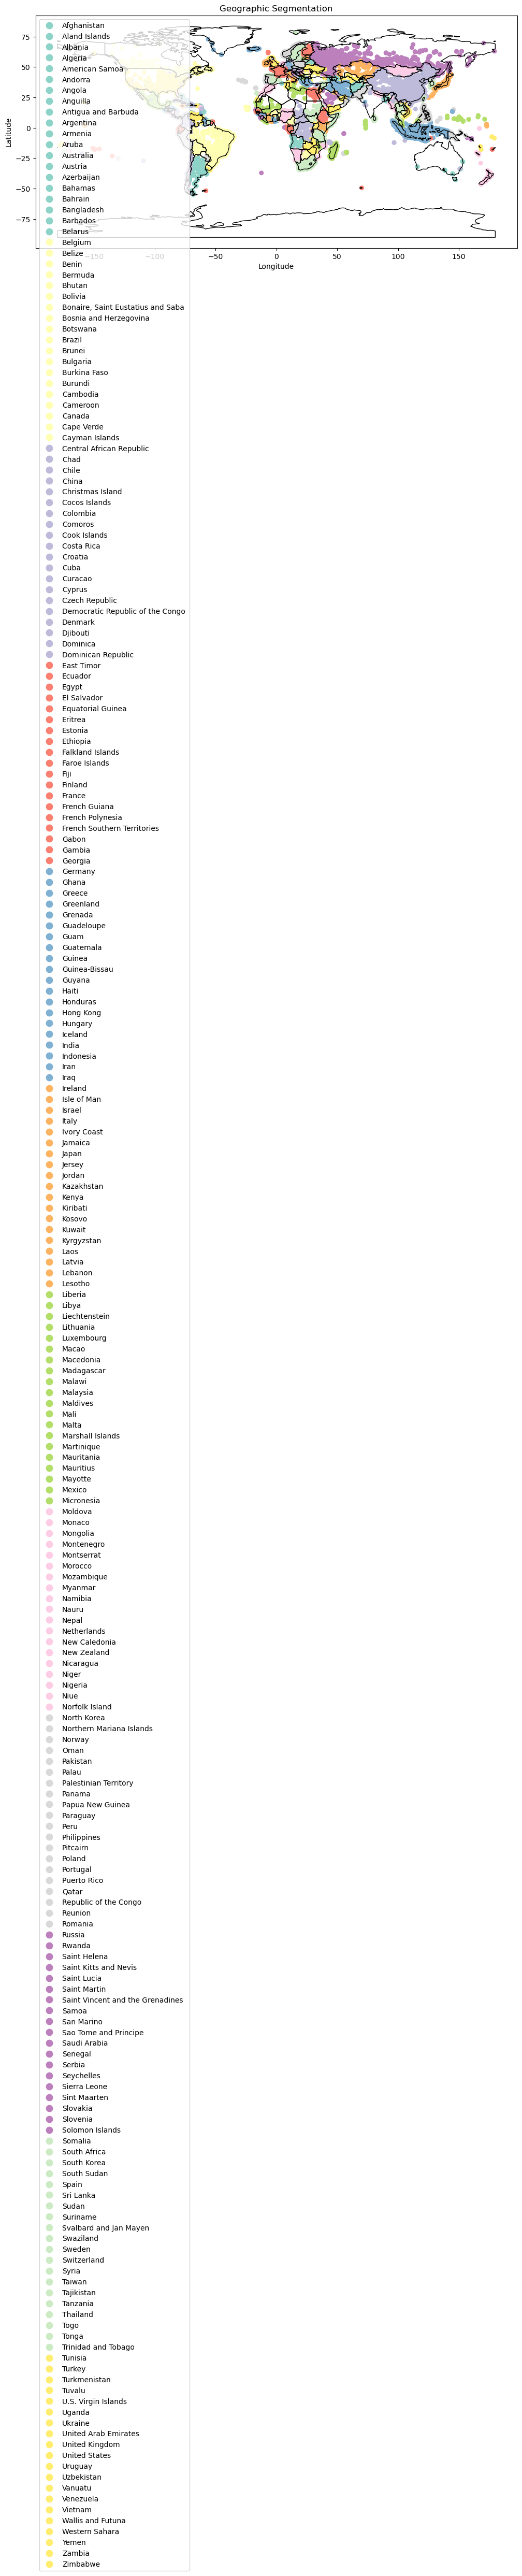

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_dataset.csv' with your actual dataset file)
dataset = pd.read_csv('Customer Segmentation.csv')

# Extract relevant columns (latitude, longitude, and other data you need)
selected_columns = ['latitude', 'longitude', 'city', 'country']
data = dataset[selected_columns]

# Drop rows with missing values
data.dropna(inplace=True)

# Create a GeoDataFrame with Point geometries
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
geo_data = gpd.GeoDataFrame(data, geometry=geometry)

# Load a world map shapefile (you can download one online)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Perform spatial join to assign countries/regions to data points
geo_data = gpd.sjoin(geo_data, world, how='left', op='within')

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))
world.boundary.plot(ax=ax, linewidth=1, color='black')
geo_data.plot(column='country', cmap='Set3', markersize=30, ax=ax, legend=True)
plt.title('Geographic Segmentation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
